In [15]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# for text analysis
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv('flipkart_data.csv')
print(data.head())

                                              review  rating
0  It was nice produt. I like it's design a lot. ...       5
1  awesome sound....very pretty to see this nd th...       5
2  awesome sound quality. pros 7-8 hrs of battery...       4
3  I think it is such a good product not only as ...       5
4  awesome bass sound quality very good bettary l...       5


In [4]:
# explore labels
pd.unique(data['rating'])


array([5, 4, 1, 3, 2], dtype=int64)

<Axes: xlabel='rating', ylabel='count'>

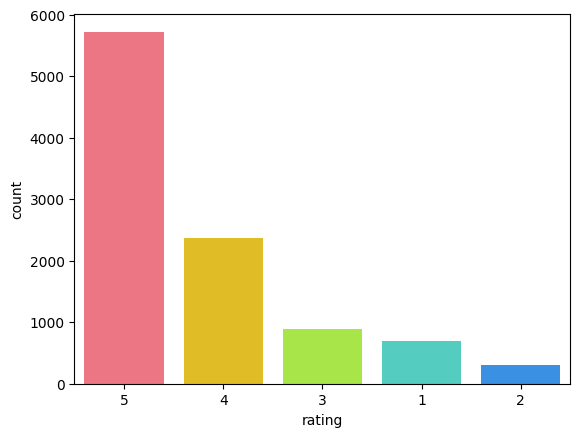

In [5]:
colors = ['#FF6374','#FFD007','#ADFF2F','#40E0D0','#1E90FF']
sns.countplot(data = data,x='rating',
              order = data.rating.value_counts().index,palette = colors)

In [6]:
# adding a column for rating sentiment
# if rating => 4 then "1"
# if rating < 4 then "0"

label = []
for i in range(len(data['rating'])):
    if data['rating'][i]>=5:
        label.append(1)
    else:
        label.append(0)
data['label'] = label

In [7]:
# preprocessing data
# re -> regular expressions

from tqdm import tqdm

def preprocess_text(text_data):
    preprocessed_text = []

    # removing punctuations
    for sentence in tqdm (text_data):

        sentence = str(sentence)
 
        sentence = re.sub( r'[^\w\s]', '', sentence) 
        tokens = nltk.word_tokenize(sentence)
        filtered_sentence = ' '.join(
            token.lower() for token in tokens if token.lower() not in stopwords.words('english')

        )
        preprocessed_text.append(filtered_sentence)
    
    return preprocessed_text


In [8]:
print(data.head())

                                              review  rating  label
0  It was nice produt. I like it's design a lot. ...       5      1
1  awesome sound....very pretty to see this nd th...       5      1
2  awesome sound quality. pros 7-8 hrs of battery...       4      0
3  I think it is such a good product not only as ...       5      1
4  awesome bass sound quality very good bettary l...       5      1


In [9]:
data["label"].value_counts()

label
1    5726
0    4250
Name: count, dtype: int64

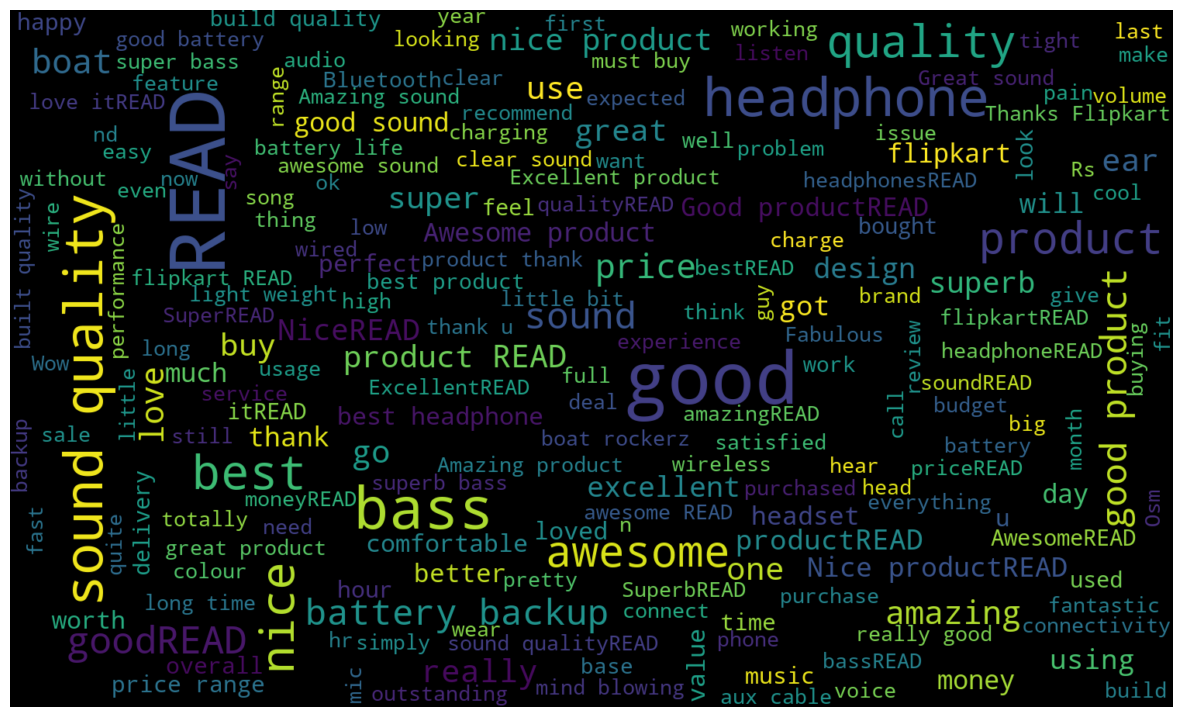

In [10]:
# creating a word cloud for label 1
consolidated = ' '.join(
    word for word in data['review'][data['label']==1].astype(str)
)

wordcloud = WordCloud(width = 1500 , height = 900,random_state = 22,
                       max_font_size=100)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud.generate(consolidated),interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [11]:
cv = TfidfVectorizer(max_features = 2500)
X = cv.fit_transform(data['review']).toarray()

In [12]:
# model training and evaluation

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,data['label'],
                                                 test_size =  0.33,
                                                 stratify = data['label'],
                                                 random_state = 42)

In [13]:
# using decison tree for prediction

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

# testing
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))

0.9362561723776747


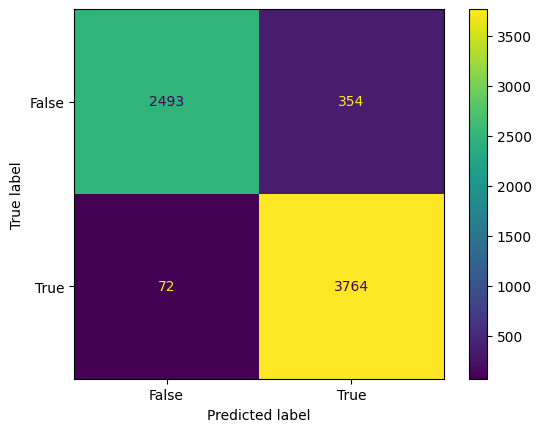

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix (y_train,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels = [False,True])

cm_display.plot()
plt.show()